### Evaluating and Optimizing Machine Learning Techniques for Automatic Nuclei Detection

<b>1. Motivation</b>

Many people die from cancer every year. This is terribly sad. :’( We would like to prevent this. One option is to identify the cancer early; treatment of nascent cancers tends to be more successful. Often, cells suffering from cancer display different biomarkers in their nuclei. These biomarkers can be seen in immunohistochemical (IHC) imaging. If there were a rapid and accurate way to screen images for cancerous cells, many cancer prognoses could be improved. We aim to develop an automated cell nuclei detection technique.

<b>2. Challenges</b>

Imaging conditions can vary tremendously - illumination, contrast, fluorescence and staining will all affect the appearance of the cell. We would also like our technique to be generalizable to many cell types because cancer is insidious and affects many cell types. Depending on the biological sample that was imaged, cells may also be aggregated; where a trained eye could distinguish individual nuclei, an algorithm might falter. 

<b>3. Pre-treatment and Initial Segmentation (“Detection”)</b>

Colour is usually either normalized or thresholded to remove noise and background [1]. A variety of pre-processing techniques can be used to find objects, from conventional blob detection, to morphological and/or contour resolution, to watershed segmentation [2-4]. We will use sensible discretion to pick a pre-treatment technique.

<b>4. Segmentation and Identification</b>

There are two primary approaches to cell segmentation:

<b><i>Traditional methods segment nuclei from single or overlapping cells</i></b>

Several traditional methods, often involving a-priori knowledge of cell shape and size [5]. First, cell clusters are segmented from the background by concavity [6-7]. Next, cell clusters can be separated into individual cells based on the concavity of the intensity distribution [7]. After individual cells have been identified, cell boundaries are often approximated using elliptical curve-fitting techniques [5,7]. Further segmentation can be applied to separate the cell nucleus from the cytoplasm. A gradient vector flow active contour model (GVF-ACM) has been shown to find boundaries between the nucleus and cytoplasm [8].

In this work, we can begin performing segmentation using the scikit-image package for python. This package includes methods for ellipse and boundary fitting, as well as edge detection and active contour modeling.

<b><i>Machine learning methods identify nuclei via classification algorithms</i></b>

Machine learning and pattern recognition have been successfully used to identify and segment cells in IHC images [9]. Whether using techniques such as cluster analysis [10], random forests [9], or deep neural networks [11-13], the workflow is similar. First, initial segmentation is performed (often in the pre-treatment step) to find cells and agglomerates. Then, training data is fed through a classifier to extract the most important features. Repeating this process while keeping only the most important feature vectors establishes a model, which is finally used to classify new test data.

We will start with cluster analysis and random forest classifiers (from the scikit-learn package), but likely will also employ traditional GVF or ellipse-fitting algorithms (which we will implement in python) to refine initial segmentation. If necessary, we also intend to look into convolutional neural networks implemented with the TensorFlow package.

### References

[1] M. Veta, P.J. Van Diest, R. Kornegoor, A. Huisman, M.A. Viergever, and J.P.W. Pluim. (<b>2013</b>) Automatic Nuclei Segmentation in H&E Stained Breast Cancer Histopathology Images. <i>PLoS One</i>, 8, 7.

[2] X. Yang, H. Li, and X. Zhou. (<b>2006</b>) Nuclei Segmentation using Marker-Controlled Watershed, Tracking using Mean-Shift, and Kalman Filter in Time-Lapse Microscopy. <i>IEEE Trans. Circuits Syst. I, Reg. Papers.</i>, 53, 11.

[3] J. Cheng and J.C. Rajapakse. (<b>2009</b>) Segmentation of Clustered Nuclei with Shape Markers and Marking Function. <i>IEEE Trans. Biomed. Eng.</i>, 56, 3.

[4] S. Ali and A. Madabhushi, “An Integrated Region-, Boundary-, Shape-Based Active Contour for Multiple Object Overlap Resolution in Histological Imagery. <i>IEEE Trans. Med. Imag.</i>, 31, 7.

[5] S. Kothari, Q. Chaudry, M.D. Wang. (2009) Automated Cell Counting and Cluster Segmentation Using Concavity Detection and Ellipse Fitting Techniques. <i>Proc. IEEE Int. Symp. Biomed. Imaging</i>, 795.

[6] Y. Toyoshima, T. Tokunaga, O. Hirose, M. Kanamori, T. Teramoto, M.S. Jang, S. Kuge, T. 
Ishihara, R. Yoshida, and Y. Iino. (<b>2006</b>) Accurate Automatic Detection of Densely Distributed Cell Nuclei in 3D Space. <i>PLoS. Comput. Biol.</i>, 12, 6.

[7] H.S. Wu, J. Gil, and J.Barba. (<b>1998</b>) Optimal Segmentation of Cell Images. <i>IEE P-Vis. Image. Sign.</i>, 145, 1.

[8] S.F. Yang-Mao, Y.K. Chan, and Y.P. Chu. (<b>2008</b>) Edge enhancement nucleus and cytoplast contour detector of cervical smear images. <i>IEEE Trans. Syst. Man, Cybern. B</i>, 38, 2.

[9] O. Rujuta and A.J. Vyavahare. (<b>2017</b>) Review of Nuclei Detection, Segmentation in Microscopic Images. <i>J. Bioengineer. Biomed. Sci.</i>, 7, 2.

[10] S. Wienert, D. Heim, K. Saeger, A. Stenzinger, M. Beil, P. Hufnagl, M. Dietel, C. Denkert, F. Klauschen. (<b>2012</b>) Detection and Segmentation of Cell Nuclei in Virtual Microscopy Images: A Minimum-Model Approach. <i>Sci. Rep.</i>, 2, 503.

[11] S.K. Sadanandan, P. Ranefall, S. Le Guyader, and C. Wahlby. (<b>2017</b>) Automated Training of Deep Convolutional Neural Networks for Cell Segmentation. <i>Sci. Rep.</i>, 7, 1.

[12] K. Sirinukunwattana, S.E.A. Raza, Y.W Tsang, I.A. Cree, D.R.J. Snead, and N.M. Rajpoo. (<b>2016</b>) Locality Sensitive Deep Learning for Detection and Classification of Nuclei in Routine Colon Cancer Histology Images. <i>IEEE Trans. Med. Imag.</i>, 35, 99.

[13] N. Kumar, R. Verma, S. Sharma, S. Bhargava, A. Vahadane, and A. Sethi. (<b>2017</b>) A Dataset and a Technique for Generalized Nuclear Segmentation for Computational Pathology. <i>IEEE Trans. Med. Imag.</i>, 36, 7.

In [1]:
## change the following to where you have stored and/or extracted the files
# path = './project/'
path = '/Users/arrakis/Dropbox/Tool - Classes/ChBE 8803/Project'

n_samples = 3
#n_samples = 560 # 560 samples to train on

###################################################################

In [2]:
## load all packages used below
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
import imageio
import numpy as np
import pandas as pd
import zipfile,io
import pylab as plt
import sklearn
import matplotlib.image as mpimg
from scipy import ndimage
from sklearn import linear_model

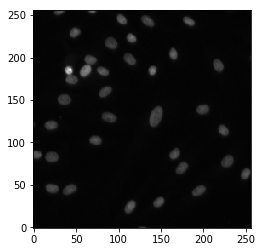

In [3]:
## STEP 1: Load an image (by index) and corresponding masks from ZIPPED stage1_train as np array

def load_zipped_img(path, img_index): # load an image and all its masks
    z = zipfile.ZipFile(path,'r') # access zip folder
    zlist = z.namelist() # list of files in zip folder
    img_name = zlist[img_index] # get selected image
    img_name = img_name[0:-1] # eliminate "/"
    
    # get image and return as np array
    img_raw = z.read('{}/images/{}.png'.format(img_name,img_name)) # get raw image
    img = io.BytesIO(img_raw) # convert image
    img = mpimg.imread(img) # numpy array
    img = np.flip(img,0) # flip image
    
    # get all masks and return as np array
    mask_list = []
    for string in zlist:
        if string.startswith(img_name+'/mask'):
            mask_list.append(string)
    mask_list = mask_list[1:-1] # list of masks
    
    masks = []
    for m in mask_list:
        mask_raw = z.read(m) # get raw mask
        mask = io.BytesIO(mask_raw) # convert mask
        mask = mpimg.imread(mask) # numpy array
        mask = np.flip(mask,0) # flip mask
        masks.append(mask)
        
    return img, masks

# WORKING EXAMPLE OF load_zipped_img
(img, masks) = load_zipped_img(path+'/stage1_train.zip',1)
imgplot = plt.imshow(img, origin='lower')
plt.show()

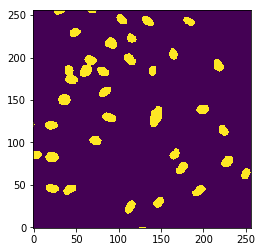

In [4]:
## STEP 2: Grayscale image and segment objects by thresholding images (currently using Otsu's method)

# convert to grayscale
def grayscale(im):
    return rgb2gray(im)

# Otsu's Method, calculates optimal threshold for equal inter-/intra-class variance
def otsu(image_gray):
    threshold_val = threshold_otsu(image_gray) #Select threshold from Otsu's method
    img_masked = np.where(image_gray > threshold_val, 1, 0)

    if np.sum(img_masked==0) < np.sum(img_masked==1):
        img_masked = np.where(img_masked, 0, 1)
    return img_masked

image_gray = grayscale(img)
img_masked = otsu(image_gray)
imgplot = plt.imshow(img_masked, origin='lower')
plt.show()

In [5]:
## STEP 3: Separate individual objects and encode in run-length format

# separate objects in image into individual masks
def separate_obj(img_masked):
    labels, nlabels = ndimage.label(img_masked)

    label_arrays = []
    for label_num in range(1, nlabels+1):
        label_mask = np.where(labels == label_num, 1, 0)
        label_arrays.append(label_mask)
    return labels, nlabels, label_mask

# convert path to run-length encoding (RLE) output format
def convert2runlength(x):
    obj = np.where(x.T.flatten()==1)[0] #1 corresponds to object, 0 to background
    run_lengths = []
    prev = -2
    for b in obj: # find continuous set of object pixels
        if (b>prev+1): run_lengths.extend((b+1, 0))
        run_lengths[-1] += 1
        prev = b
    return " ".join([str(i) for i in run_lengths])

def rle(img_masked, im_id):
    (labels, nlabels, label_mask) = separate_obj(img_masked)
    im_df = pd.DataFrame()
    for label_num in range(1, nlabels+1):
        label_mask = np.where(labels == label_num, 1, 0)
        if label_mask.flatten().sum() > 10:
            rle = convert2runlength(label_mask)
            s = pd.Series({'ImageId': im_id, 'EncodedPixels': rle})
            im_df = im_df.append(s, ignore_index=True)
    return im_df

In [6]:
# one-indexes a 2d array into 1d, top down then left right, output is np 1d array
def one_index(arr2d):
    h = arr2d.shape[0]
    w = arr2d.shape[1]
    
    arr1d = []
    for col in range(0, w):
        for row in range(0, h):
            arr1d.append(arr2d[row][col])
    return np.array(arr1d)
    
# pads all vectors in array to have max_len, returns np array
def pad_normalize(array, max_len):
    for i in range(0, len(array)):
        vec = array[i]
        if len(vec) < max_len:
            array[i] = np.concatenate(( np.array(vec).reshape(1,-1), np.zeros((1, (max_len-len(vec)))) ), axis=1)
        else:
            array[i] = np.array(vec).reshape(1,-1)
    return np.array(array)

## EXAMPLE TRAINING

z = zipfile.ZipFile(path+'/stage1_train.zip','r') # access zip folder
zlist = z.namelist() # list of files in zip directory
samples = zlist[0:n_samples-1] # 0 < samples <= 560

x_train = [] # predicted segmentation using Otsu's thresholding
y_train = [] # "correct" segmentation from sum of masks
max_len = 0
for i in range(0, n_samples):
    (img, masks) = load_zipped_img(path+'/stage1_train.zip', i) # loads image and associated masks
    h = img.shape[0]
    w = img.shape[1]
    
    x_vec = one_index(otsu(grayscale(img)))
    y_vec = one_index(sum(masks))
            
    if len(x_vec) > max_len: max_len = len(x_vec)
    x_train.append(x_vec)
    y_train.append(y_vec)

x_train = np.squeeze(pad_normalize(x_train, max_len), axis=1)
x_shortfeature = x_train[:, 0:10000]
y_train = np.squeeze(pad_normalize(y_train, max_len), axis=1)
y_shortfeature = y_train[:, 0:10000]

linreg = linear_model.LinearRegression() # create linear regression object
linreg.fit(x_shortfeature, y_shortfeature) # train the model using the training sets

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
## EXAMPLE TESTING

(img_test, mask_test) = load_zipped_img(path+'/stage1_train.zip', 5)
X_test = one_index(otsu(grayscale(img)))
X_test = X_test[:10000].reshape(1, -1)
y_pred = linreg.predict(X_test) # predict using the testing set
y_pred = sum(y_pred).reshape(1,-1)
y_pred = np.round(y_pred)

# Scoring
y_actual = one_index(sum(mask_test))[:10000].reshape(1, -1)
accuracy = sklearn.metrics.accuracy_score(y_pred.T,y_actual.T)

print(accuracy)

0.7518
